
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**:Marcelino Zúñiga

**Rol**:201610504-2

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
#Memoria que ocupa el dataset

import sys
Memoria = digits.memory_usage() #Determina la memoria ocupada por cada columna en bytes
total = (Memoria[1]*65)/1000 #Como todas las columnas ocupan la misma cantidad de memoria multiplicamos por la cantidad
                            #de columnas que son 65 y dividimos por 1000 para dejar el dato en kilobyte
print(total, 'kilobytes')

467.22 kilobytes


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [7]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

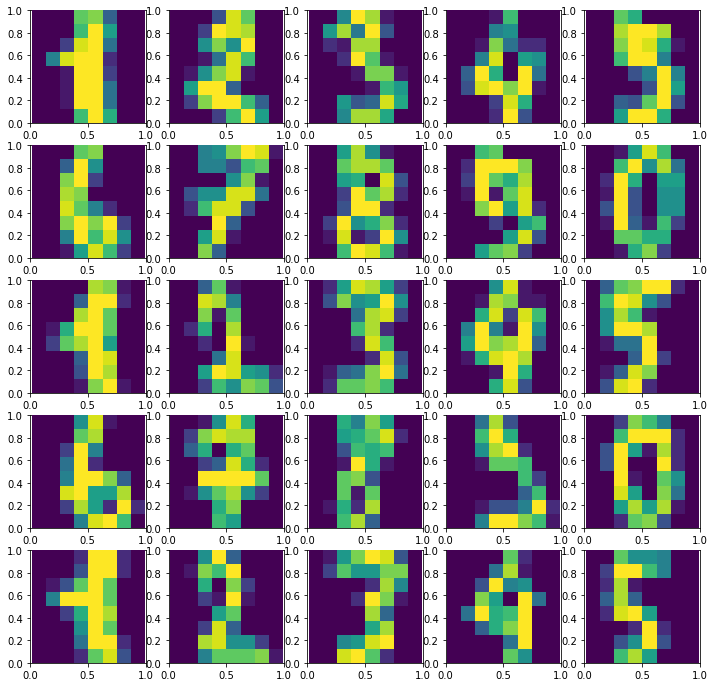

In [8]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i in range(1, 26):
    img = digits_dict["images"][i]
    fig.add_subplot(5, 5, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [9]:
X = digits.drop(columns="target").values
y = digits["target"].values
from metrics_classification import summary_metrics as sm
from sklearn.metrics import confusion_matrix

In [10]:
#Entrenamiento del modelo
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    train_size=0.80,
                                                    random_state=1997)
#Imprimimos el conjunto de entrenamiento y testeo
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

numero de filas train set     :  1437
numero de filas test set      :  360


### REGRESIÓN LOGÍSTICA

In [11]:
#Modelo de Regresión logística usando GridsearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

#Selección de hiperparámetros
metric_lr = {
          'penalty' : ['l1', 'l2'],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          'random_state':[0,1997]
          }

lr = LogisticRegression()

lr_gridsearchcv = GridSearchCV(estimator = lr, param_grid = metric_lr, cv = 10)
#Temporizador
start_time = time.time()

lr_grid_result = lr_gridsearchcv.fit(X_train, y_train)


print("%s segundos" % (time.time() - start_time))

22.994425058364868 segundos


In [12]:
#Vemos los mejores parametros utilizados
print("El mejor tiempo es de: %f usando %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))


El mejor tiempo es de: 0.954060 usando {'class_weight': 'balanced', 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}


In [13]:
#Calculo de métricas con matriz de confusión

y_lrpred = lr_gridsearchcv.predict(X_test)
d = dict( y=y_test, yhat = y_lrpred)

df_aux= pd.DataFrame.from_dict(d, orient='index').transpose()

In [14]:
print(confusion_matrix(y_test,y_lrpred))
sm(df_aux)

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  2  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  1  1  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  1  0  0 35  2  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 32  1  1]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 47]]


,accuracy,recall,precision,fscore
0,0.9667,0.9693,0.9647,0.966


# KNN

In [15]:
#Método K-Nearest Neighbours usando GridSearchCV

from sklearn.neighbors import KNeighborsClassifier


#Selección de hiperparámetros
metric_knn = {
          'n_neighbors' : [5, 7, 11, 17],
          'weights' : ['uniform', 'distance'],
          'metric' : ['manhattan','chebyshev'],
          'algorithm' : ['auto','ball_tree', 'kd_tree']
          }

knn = KNeighborsClassifier()

knn_gridsearchcv = GridSearchCV(estimator = knn, param_grid = metric_knn, cv = 10)
#temporizador
start_time = time.time()

knn_grid_result = knn_gridsearchcv.fit(X_train, y_train)


print(" %s segundos" % (time.time() - start_time))

 23.240086793899536 segundos


In [16]:
print("Mejor tiempo: %f usando %s" % (knn_grid_result.best_score_, knn_grid_result.best_params_))

Mejor tiempo: 0.980517 usando {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [17]:
#Calculo de métricas con matriz de confusión

y_knnpred = knn_gridsearchcv.predict(X_test)
d = dict( y=y_test, yhat = y_knnpred)
    
df_aux= pd.DataFrame.from_dict(d, orient='index').transpose()

In [18]:
print(confusion_matrix(y_test,y_knnpred))
sm(df_aux)

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  1  0 37  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 26  1]
 [ 0  0  0  0  0  0  0  0  0 47]]


,accuracy,recall,precision,fscore
0,0.9861,0.9854,0.9877,0.9863


# Perceptron

In [19]:
from sklearn.linear_model import Perceptron

In [20]:
turned_parameters ={'tol':[1e-3,1e-5,1e-1],
                    'random_state': [0,10],
                    'shuffle':[True,False],
                    'eta0':[1,0.5,10]
                   }

scores = ['precision', 'recall']

P_gridsearchcv = GridSearchCV(estimator = Perceptron(), param_grid = turned_parameters, cv = 10)
#Temporizador
start_time = time.time()

P_grid_result = P_gridsearchcv.fit(X_train, y_train)


print("%s segundos" % (time.time() - start_time))

12.549903869628906 segundos


In [21]:
P_grid_result = P_gridsearchcv.fit(X_train, y_train)

In [22]:
#Calculo de métricas con la matriz de confusión

y_ppred = P_gridsearchcv.predict(X_test)
d = dict( y=y_test, yhat = y_ppred)
    
df_aux= pd.DataFrame.from_dict(d, orient='index').transpose()

In [23]:
print(confusion_matrix(y_test,y_ppred))
sm(df_aux)

[[35  0  0  0  0  0  0  0  1  0]
 [ 0 45  0  0  0  0  0  0  3  0]
 [ 0  1 20  1  0  0  0  0  1  0]
 [ 0  0  0 34  0  0  0  1  1  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 36  1  0  1  1]
 [ 0  1  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 32  1  1]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  1  0  1  0  0  0  1  1 43]]


,accuracy,recall,precision,fscore
0,0.9472,0.9474,0.95,0.9463


### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [24]:
#Cross Validation usando KNN
from sklearn.model_selection import cross_val_score

precision = cross_val_score(estimator=knn_gridsearchcv,
                            X=X_train,
                            y=y_train,
                            cv=10)

precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.99, 0.98, 0.99, 0.96, 0.98, 0.98, 0.99, 0.97, 0.98, 0.99] 
Precision promedio:  0.981 +/-  0.009


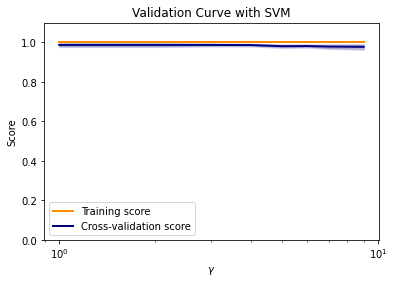

In [25]:
#curva de validación

from sklearn.model_selection import validation_curve

param_range = np.array([i for i in range(1, 10)])

#Validation curve usando los mejores hiperparámetros 
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(weights = 'distance',metric = 'euclidean'), X_train, y_train, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

La curva de training score es perfecta porque el modelo memoriza los datos de entrenamiento, por otro lado la curva de cross validation es muy buena, esto nos dice que el modelo knn se comporta sin importar la cantidad de cluster, aunque se puede apreciar que si se aumentan los cluster el rendimiento empiesa a bajar

In [26]:
#Determinamos la cantidad de neighbors necesarios

index = np.argmax(test_scores_mean)
param_range[index]

3

In [27]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    train_size=0.80,
                                                    random_state=1997)

classifier = KNeighborsClassifier(weights = 'distance',metric = 'euclidean', n_neighbors = param_range[index])
y_score = classifier.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

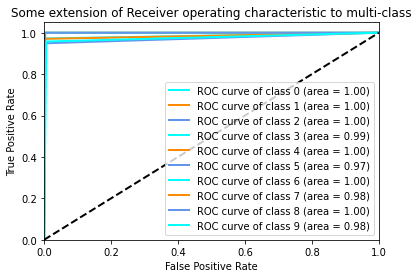

In [29]:
#AOC-ROC para multiples clases (código también obtenido del link)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

En este caso podemos ver que la mayoria de los casos se comporta muy bien, pero el aumento de clusters baja un poco el rendimiento de las predicciones hechas por el modelo

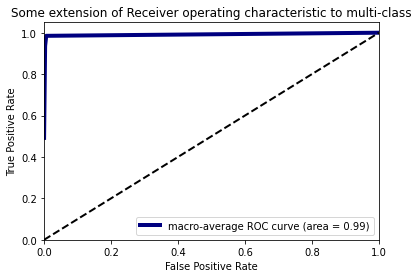

In [30]:
#Curva promedio de las multi-clases

import sys
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Para este caso podemos ver que la curva sigue siendo muy buena, que era de esperarse por los casos anteriores.

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


# selección de atributos

In [31]:
x_training = digits.drop(columns="target")
y_training = digits["target"]
x_training = x_training.drop(['c00','c32','c39'],axis=1)

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k = 30  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
X_a=x_training[atributos]

In [33]:
#Método K-Nearest Neighbours usando GridSearchCV

#Selección de hiperparámetros
metric_knn = {
          'n_neighbors' : [5, 7, 11, 17],
          'weights' : ['uniform', 'distance'],
          'metric' : ['manhattan','chebyshev'],
          'algorithm' : ['auto','ball_tree', 'kd_tree']
          }

knn = KNeighborsClassifier()

knn_gridsearchcv = GridSearchCV(estimator = knn, param_grid = metric_knn, cv = 10)
#temporizador
start_time = time.time()

knn_grid_result = knn_gridsearchcv.fit(x_training, y_training)


print("tiempo de %s segundos, que demora antes de seleccionar atributos" % (time.time() - start_time))
#Método K-Nearest Neighbours usando GridSearchCV

#Selección de hiperparámetros
metric_knn = {
          'n_neighbors' : [5, 7, 11, 17],
          'weights' : ['uniform', 'distance'],
          'metric' : ['manhattan','chebyshev'],
          'algorithm' : ['auto','ball_tree', 'kd_tree']
          }

knn = KNeighborsClassifier()

knn_gridsearchcv = GridSearchCV(estimator = knn, param_grid = metric_knn, cv = 10)
#temporizador
start_time = time.time()

knn_grid_result = knn_gridsearchcv.fit(X_a, y_training)


print('tiempo de %s segundos, que demora despues de seleccionar atributos' % (time.time() - start_time))

tiempo de 34.83148789405823 segundos, que demora antes de seleccionar atributos
tiempo de 22.334328174591064 segundos, que demora despues de seleccionar atributos


In [34]:
print('tamaño del dataframe antes de seleccionar atributos',np.array(x_training.shape))
print('tamaño del dataframe antes de seleccionar atributos',np.array(X_a.shape))

tamaño del dataframe antes de seleccionar atributos [1797   61]
tamaño del dataframe antes de seleccionar atributos [1797   30]


### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [35]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = np.array(y_pred)[mask]
    
    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    fix = X_aux.shape[0]
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            if index < fix:
                data  = X_aux[index, :].reshape(8,8)
                label_pred = str(int(y_aux_pred[index]))
                label_true = str(int(y_aux_true[index]))
                ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
                ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
                ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
                ax[i][j].get_xaxis().set_visible(False)
                ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

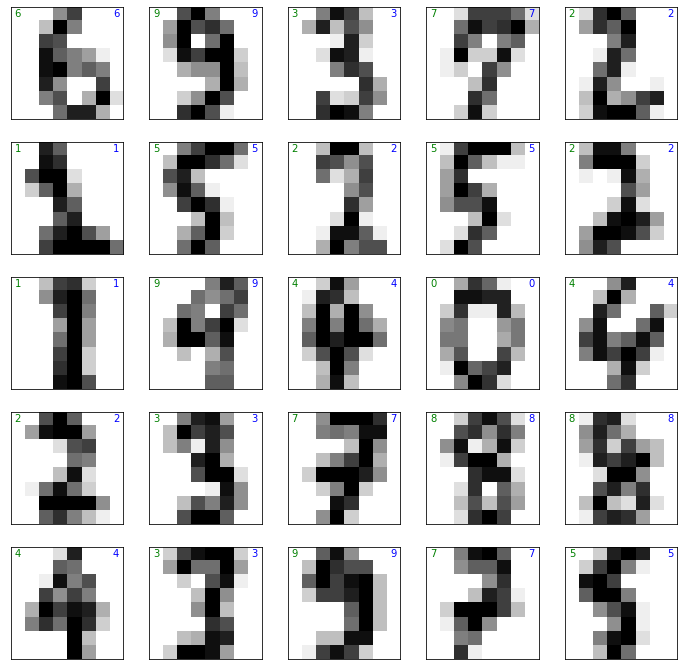

In [36]:
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "correctos")

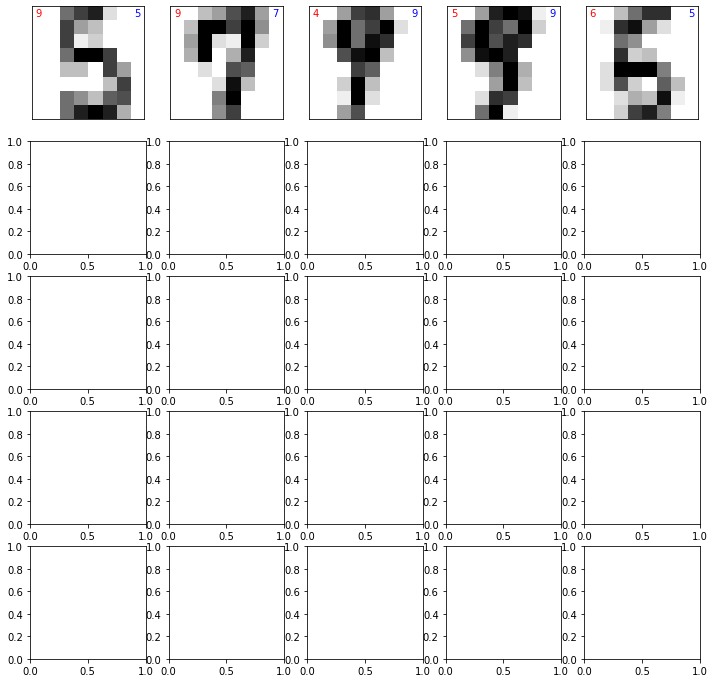

In [37]:
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "incorrectos")

Esto sucede porque los números en que fallo se parecen a la predicción hecha, por ejemplo el 9 y el 4 se parecen si el cuatro se dibuja con curvas redondeadas.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Finalmente se puede concluir que el mejor modelo que es knn nos entrega una buena predicción de los datos, ya que solo nos entregan menos de 10 casos erroneos de los más de 1000. Las visualizaciones nos permiten comprender de manera simple el comportamiento de nuestro modelo frente variaciones. Para trabajos futuros podre comprobar que modelos, y con que hiperparametros se podra trabajar mejor un problema.